<a href="https://colab.research.google.com/github/MarioBolanos/Modelado2020_2/blob/master/Metodo_de_Runge_Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El método Runge-Kutta




## Revisiting Euler's Method

Considere la misma EDO (no lineal) que se discutió en los módulos anteriores,
$$
\dot{x}(t) = \cos(x(t)) + \sin(t), \qquad \dot{x}\equiv\frac{\textrm{d}x(t)}{\textrm{d}t}
$$
con condición inicial $ x (t_0) = 0, t_0 = 0 $. El método de Euler (explícito) resuelve este problema discretizando las variables de manera que

\begin{align*}
t     & \rightarrow t_n     \qquad\equiv t_0 + n\cdot\Delta t,\\[1.0em]
x(t)  & \rightarrow x(t_n)  \quad\equiv x_n                 ,\\[1.0em]
n     & = 0,1,\ldots,N;                 
\end{align*}
Entonces, el valor de la función $ x_ {n + 1} $ puede aproximarse por el valor anterior más el cambio (derivada) en ese punto multiplicado por la distancia en el tiempo $ \Delta t $ entre $ x_n $ y $ x_ {n + 1} $. Es decir,

$$
x_{n+1} = x_n + (\Delta t) \cdot \dot{x}_n, \qquad \Delta t = \frac{t_N - t_0}{N} \equiv h
$$


Para este problema en particular, se nos da $ \ dot {x} _n (t_n) $, de modo que esto se puede insertar directamente en la fórmula de Euler dando,
$$
x_{n+1} = x_n + h [\cdot \cos(x_n) + \sin(t_n)]
$$

Que se trata de todo lo necesario para solucionar el problema actual. Para una explicación más completa y detallada del método Euler, eche un vistazo a los módulos 4.1 (explícito) y 4.3 (implícito)

In [ ]:
%matplotlib inline
import numpy as np               # Numerical Python
import matplotlib.pyplot as plt  # Graph and Plot handling
import time                      # Time Measure

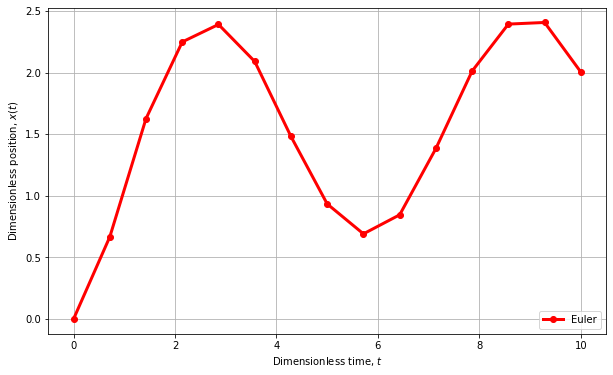

In [ ]:

# A quick implementation of Euler's Method for solving
# the above Initial Value Problem

# Try adjusting 'N' to see how the numerical solution converges

t0   = 0.0
tN   = 10.0
N    = 15
t    = np.linspace(t0,tN,N)
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Initial condition:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Dimensionless position, $x(t)$')
plt.xlabel(r'Dimensionless time, $t$')
plt.legend(loc=4) # 'loc' sets the location of the legend-text in the plot 
plt.grid()
plt.show()

Un análisis de error rápido muestra que el error de truncamiento local emitido en <i> todos y cada uno de los pasos </i> del método de Euler es proporcional al tamaño del paso al cuadrado $ h^2 = (\Delta t)^2 $, por Taylor expandiendo la función sobre $ t + h $

\begin{align*}
\text{Exact:} & \qquad x(t + h) =  x(t) + h\dot{x} + \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots  \\[1.2em]
\text{Euler:} & \qquad x(t + h) \approx  x(t) + h\dot{x}\\[1.2em]
\text{Error:} & \qquad e = \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots
\end{align*}

Ahora, si iteramos el sistema un total de $ N = \frac{t_N - t_0} {h} \propto h ^ {- 1} $ veces, entonces el error global total es $ E = N \cdot e \propto h $. Es decir, el método de Euler es un método de primer orden, como se concluyó en los módulos anteriores, que también proporciona un análisis de errores más profundo del método de Euler. <strong> La pregunta ahora es: ¿podemos obtener una mejor solución aproximada del mismo tamaño de paso? </strong>

## Mejorando el método de Euler

El concepto subyacente del método de Runge-Kutta que queremos mostrar, se basa en los mismos conceptos básicos que el método de Euler. Considere ahora que aplicamos el método de Euler nuevamente, sin embargo, esta vez no usaremos la derivada en $ x_ {n + 1} $, sino en el punto medio $ x_ {m} = \ frac {x_ {n + 1} + x_n} {2} $, denominado <i><u>test-point</u> </i>. Entonces se puede calcular un $ x_ {n + 1} $ más exacto usando la información de la derivada en este punto medio ($ \ dot {x} _m $) del intervalo $ h $ entre $ x_n $ y $ x_ {n + 1} $. Es decir,

\begin{align*}
x_{n+1} &= x_n + h\cdot \dot{x}_m \\[1.2em]
        &= x_n + h\cdot [\cos(x_m) + \sin(t_m)] \\[0.8em]
        &= x_n + h\cdot \left[\cos\left(x_n + \frac{h \dot{x}_n}{2}\right) + \sin\left(t_n+\frac{h}{2} \right)\right] \\[1.0em]
        &= x_n + h\cdot \left[\cos\left(x_n + \frac{h}{2}[\cos(x_n)+\sin(t_n)]\right) + \sin\left(t_n+\frac{h}{2} \right)\right]
\end{align*}

Ahora, grafémoslo contra el enfoque de Euler original y estudiemos la diferencia.

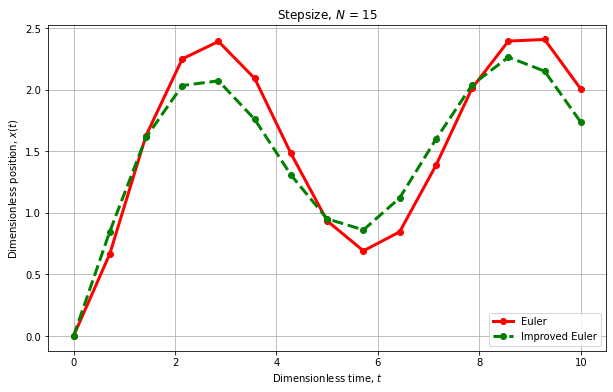

In [ ]:
x_imp = np.zeros(N) 

for n in range(0,N-1):
    x_imp[n+1] = x_imp[n] + h * ( np.cos(x_imp[n]+(h/2.0)*(np.cos(x_imp[n]) + np.sin(t[n]))) + np.sin(t[n]+h/2.0)  )

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu ,'-ro' ,linewidth=3.0,label=r'Euler')
plt.plot(t,x_imp,'--go',linewidth=3.0,label=r'Improved Euler')
plt.ylabel(r'Dimensionless position, $x(t)$')
plt.xlabel(r'Dimensionless time, $t$')
plt.title(r'Stepsize, $N$ = %i' % N)
plt.legend(loc=4) # 'loc' sets the location of the legend-text in the plot 
plt.grid()
plt.show()

La nueva aproximación es significativamente diferente de la solución proporcionada por el enfoque de Euler original (usando $ N = 15 $). Lo que hemos implementado aquí, a menudo se denomina <i> Método Euler mejorado </i> o <i> Método del punto medio </i> para EDO. Sin embargo, un niño querido tiene muchos nombres, y nos referiremos a él como <strong> El método Runge-Kutta de segundo orden </strong>. Si asumimos que nuestro método mejorado es más preciso, se ve que el enfoque original se desborda, lo cual es un problema conocido del método de Euler.


Comparemos brevemente los errores de los dos enfoques, estimando primero el error de nuestro esquema mejorado de manera similar a la anterior, expandiendo Taylor alrededor de $ (t + h / 2) $. El esquema mejorado aplica la aproximación
$$
x(t+h) \approx x(t) + h\dot{x}(t+h/2)
$$

donde expandimos $ \ dot {x} (t + h / 2) $ resultando en

$$
\dot{x}(t+h/2) = \dot{x}(t) + (h/2)\ddot{x} + \frac{(h/2)^2}{2}\dddot{x} + \mathcal{O}(h^3)
$$

De manera similar al método de Euler, comparamos nuestro esquema mejorado con la expansión de Taylor exacta,

\begin{align*}
\text{Exact:} & \qquad x(t + h) =  x(t) + h\dot{x} + \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots  \\[1.2em]
\text{Impr. E.:} & \qquad x(t + h) \approx  x(t) + h[\dot{x}(t) + (h/2)\ddot{x}]\\[1.2em]
\text{Error:} & \qquad e = \frac{h^3}{6}\dddot{x} + \mathcal{O}(h^4)
\end{align*}

Esto implica un error global $ E = N \cdot e \propto h^2 $, que efectivamente da un método de precisión de segundo orden en $ h $, no tan sorprendente considerando el nombre del método. Preguntémonos de nuevo: <strong> ¿podemos hacerlo aún mejor? </strong>

## El método general (cuarto orden) de Runge-Kutta

Lo que hizo Euler fue estimar $ x_{n + 1} $ usando $ x_n $ y $ \dot {x} _n $. Lo que acabamos de hacer fue estimar $ x_{n + 1} $ usando $ x_n $ y la derivada del punto intermedio, es decir, el punto medio de prueba, $ x_m $. Ahora, aquí hay una idea interesante: <i> <strong> ¿Sería posible usar un punto de prueba similar para calcular la derivada al punto de prueba real? </strong> </i> Tómese un tiempo para pensar lo que implica esta pregunta antes de seguir leyendo.

La respuesta quizás no tan innovadora a la pregunta anterior es <strong> sí </strong>. De hecho, podemos hacerlo aún mejor: podemos hacer un punto de prueba, para el punto de prueba del punto de prueba, ¡y así sucesivamente! Da la casualidad de que el <strong> método Runge-Kutta de cuarto orden </strong> utiliza tres de estos puntos de prueba y es el método Runge-Kutta más utilizado. Puede preguntar por qué no usamos cinco, diez o incluso más puntos de prueba, y la respuesta es bastante simple: no es computacionalmente libre calcular todos estos puntos de prueba, y la ganancia en precisión disminuye rápidamente más allá del cuarto orden. del método. Es decir, si la alta precisión es de tal importancia que necesitaría un Runge-Kutta de décimo orden, entonces es mejor reducir el tamaño del paso $ h $ que aumentar el orden del método.

Además, existen otros métodos más sofisticados que pueden ser más rápidos y precisos para elecciones equivalentes de $ h $, pero obviamente, pueden ser mucho más complicados de implementar. Ver, por ejemplo, <i> Extrapolación de Richardson </i>, <i> el método Bulirsch-Stoer </i>, <i> Métodos multipaso, métodos multivalor </i> y <i> métodos Predictor-Corrector </i> .

Sin embargo, ahora mostramos una expresión general para el método de Runge-Kutta ordenado arbitrariamente, antes de aplicar el método de cuarto orden al problema dado anteriormente. Nuevamente, considere una EDO escrita en el formulario

$$
\dot{x}(t) = g(x(t),t)
$$

Luego, para el método <strong> general </strong> $ q $ ordenado por Runge-Kutta, uno tiene
\begin{align*}
k_1 &= h\cdot g(x_n, t_n) \\[1.0em]
k_2 &= h\cdot g(x_n + a_{2,1}k_1                                   , t+c_2 h ) \\[1.0em]
k_3 &= h\cdot g(x_n + a_{3,1}k_1 + a_{3,2}k_2                      , t+c_3 h ) \\[1.0em]
k_4 &= h\cdot g(x_n + a_{4,1}k_1 + a_{4,2}k_2 + a_{4,3}k_3         , t+c_4 h ) \\[1.0em]
    &\qquad \vdots   \\[1.0em]
k_q &= h\cdot g(x_n + [a_{q,1} k_1 + a_{q,2}k_2+\ldots+a_{q,q-1}k_{q-1}], t_n + c_q h )
\end{align*}

Tal que,

\begin{equation*}
x_{n+1} = x_n + \sum_{i=1}^{q} b_i k_i
\end{equation*}


El esquema que se presenta ahora en su forma general, tiene algunos coeficientes indefinidos: $ a_ {i, j} $, $ b_ {i} $ y $ c_ {i} $. Los elementos $ a_ {i, j} $ se indican como la Matriz de Runge-Kutta, mientras que $ b_i $ son pesos y $ c_i $ son nodos. Derivar estos (y coeficientes para otros métodos similares) puede ser una tarea tediosa de álgebra complicada. Por lo tanto, estos coeficientes se obtienen generalmente de tablas en la literatura. Los coeficientes de los métodos de Runge-Kutta se pueden encontrar usando el cuadro de (John C.) Butcher,

\begin{array}{ c|c c c }
  0   &         &&              &&& \\
  c_2 & a_{2,1} &&              &&& \\
  c_3 & a_{3,1} && a_{3,2} &&& \\
  \vdots &      &\ddots&         &&& \\
  c_q & a_{q,1} && a_{q,2} & \ldots & a_{q,q-1}&& \\
  \hline
      & b_1     && b_2     & \ldots & b_{q-1}  && b_q
\end{array}

A continuación, los coeficientes se determinan exigiendo que el método sea <i> consistente </i>. La consistencia de una aproximación numérica (diferencia finita) se refiere al hecho de que el problema aproximado (ecuación) se aproxima al problema exacto en el límite del tamaño del paso que va hacia cero. Para el método de Runge-Kutta, este es el caso cuando

\begin{equation*}
\sum_{j=1}^{l-1} a_{i,j} = c_i, \text{  for  } l\in 2,3,\ldots,q;
\end{equation*}

Pueden existir múltiples opciones para los coeficientes de un orden arbitrario $ q $, pero no profundizaremos en los detalles de su derivación. En cambio, damos la opción quizás más ampliamente aplicada para el método de cuarto orden $ (q = 4) $, para el cual el cuadro de Butcher es

\begin{array}{ c|c c c }
  0   &     &     &     &    \\
  1/2 & 1/2 &     &     &    \\
  1/2 & 0   & 1/2 &     &    \\
  1   & 0   & 0   & 1   &    \\
  \hline
      & 1/6 & 1/3 & 1/3 & 1/6 \\
\end{array}
La tabla anterior permite los cálculos de $ k_1 $, $ k_2 $, $ k_3 $ y $ k_4 $ de modo que ahora podemos aplicar el método de Runge-Kutta de cuarto orden al problema en cuestión.

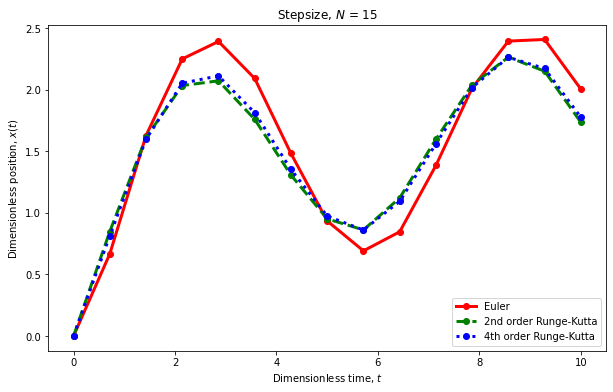

In [ ]:
x_4RK = np.zeros(N) ## Runge-Kutta

def g(x_,t_):
    return np.cos(x_) + np.sin(t_)

for n in range(0,N-1):
    k1 = h*g( x_4RK[n]       , t[n]         )
    k2 = h*g( x_4RK[n] + k1/2, t[n] + (h/2) ) 
    k3 = h*g( x_4RK[n] + k2/2, t[n] + (h/2) ) 
    k4 = h*g( x_4RK[n] + k3  , t[n] +  h    )
    
    x_4RK[n+1] = x_4RK[n] + k1/6 + k2/3 + k3/3 + k4/6
    
plt.figure(figsize=(10,6))
plt.plot(t,x_Eu, '-ro' , linewidth=3.0,label=r'Euler')
plt.plot(t,x_imp,'--go', linewidth=3.0,label=r'2nd order Runge-Kutta')
plt.plot(t,x_4RK,':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'Dimensionless position, $x(t)$')
plt.xlabel(r'Dimensionless time, $t$')
plt.title(r'Stepsize, $N$ = %i' % N)
plt.legend(loc=4) 
plt.show()

Se ve que hay una diferencia marginal entre las implementaciones de cuarto y segundo orden de Runge-Kutta, mientras que el método de Euler tiene un error significativo. Recomendamos que ajuste el número total de puntos $ N $, para ver cómo los diferentes métodos se acercan entre sí (y la solución exacta) como $ h \overset {N \to \infty} {\longrightarrow} 0 $.

### Derivadas de orden superior y conjuntos de EDO de primer orden

Hasta ahora, nos hemos restringido a considerar las EDO que contienen solo derivadas ordenadas primero (y cero), sin embargo, esto es de hecho todo lo que uno tiene que dominar. Tenga cuidado de no confundir el orden (derivado) de la ecuación y el orden (precisión) del método numérico. Una EDO ordenada por $ q $ siempre se puede reducir a un conjunto de dos EDO ordenadas por $ (q-1) $. Considere la EDO general, lineal, de segundo orden con coeficientes constantes y algunas condiciones iniciales arbitrarias

$$
a\ddot{x} + b\dot{x} + cx = g(t), \qquad x = x(t)
$$

Introduzca entonces una nueva variable, $ \nu (t) \equiv \dot{x}(t) $ de modo que el problema anterior pueda expresarse mediante

\begin{align*}
\dot{x}   &= \nu                            &\equiv F(x,\nu,t)\\[1.0em]
\dot{\nu} &= \frac{1}{a} ( g(t) - b\nu - cx ) &\equiv G(x,\nu,t)
\end{align*}

Donde hemos introducido $ F, G $ solo para generalidad. De hecho, el método también sería aplicable para el caso más general donde $ a, b, c $ son funciones de $ x,\nu,t$.

Sin embargo, este conjunto de dos EDO dependientes de primer orden se puede resolver utilizando un método de Runge-Kutta. De hecho, podemos resolver cualquier conjunto de EDO de <u> primer </u> orden de $ M $, sin embargo, tenga en cuenta que en este ejemplo en particular los puntos de prueba para $ x $ dependerán de los de $ \nu $ y viceversa, de modo que las dos ecuaciones deberán resolverse simultáneamente. Eso también se aplica a un conjunto de EDO de tamaño arbitrario.

Para el método de Runge-Kutta de cuarto orden, se obtiene por paso de tiempo $ n $

\begin{align*}
k_{x1} &= h \cdot F\left(x_n                   ,\nu_n                     ,t_n             \right), & k_{\nu1} &= h \cdot G\left(x_n                   ,\nu_n                     ,t_n             \right) \\[1.0em]
k_{x2} &= h \cdot F\left(x_n + \frac{k_{x1}}{2},\nu_n + \frac{k_{\nu1}}{2},t_n+\frac{h}{2} \right), & k_{\nu2} &= h \cdot G\left(x_n + \frac{k_{x1}}{2},\nu_n + \frac{k_{\nu1}}{2},t_n+\frac{h}{2} \right) \\[1.0em]
k_{x3} &= h \cdot F\left(x_n + \frac{k_{x2}}{2},\nu_n + \frac{k_{\nu2}}{2},t_n+\frac{h}{2} \right), & k_{\nu3} &= h \cdot G\left(x_n + \frac{k_{x2}}{2},\nu_n + \frac{k_{\nu2}}{2},t_n+\frac{h}{2} \right) \\[1.0em]
k_{x4} &= h \cdot F\left(x_n +       k_{x3}    ,\nu_n +       k_{\nu3}    ,t_n+h           \right), & k_{\nu3} &= h \cdot G\left(x_n +       k_{x3}    ,\nu_n +       k_{\nu3}    ,t_n+h           \right)
\end{align*}

Tal que,

\begin{align*}
    x_{n+1}   &=   x_n + k_{x1}/6    + k_{x2}/3    + k_{x3}/3    + k_{x4}/6    \\[1.0em]
    \nu_{n+1} &= \nu_n + k_{\nu 1}/6 + k_{\nu 2}/3 + k_{\nu 3}/3 + k_{\nu 4}/6 
\end{align*}


Para $ n = 1, \ldots, N-1; $ mientras que $ x_0 $, $ \nu_0 $ deberían conocerse como condiciones iniciales. Tenga en cuenta que el tamaño de paso $ h $ puede retirarse del interior de $ k $ y dejarse para el cálculo de $ x_ {n + 1} $ en su lugar, lo que reducirá algo el número total de cálculos / operaciones en cada ciclo. También debe notar que $ k_ {xi} $ depende de $ k _ {\ nu (i-1)} $ y $ k _{\nu i} $ depende de $ k_{x (i-1)} $. Por lo tanto, los valores de $ k $ deben calcularse de manera ordenada.

Concluimos que para un sistema de $ M $ ecuaciones de primer orden, el número total de $ k $ -valores para un método de Runge-Kutta con $ q $ será $ M\cdot q $. Es decir, grandes conjuntos de ecuaciones diferenciales con derivadas de órdenes superiores darán como resultado un conjunto aún mayor de EDO de primer orden que producirán una gran cantidad de variables de $ k $. Si este es el caso, es posible que desee reconsiderar si el método Runge-Kutta realmente es el mejor enfoque para su problema.

Sin embargo, el método Runge-Kutta es bastante fácil y directo de implementar, y proporciona lo que llamaremos una precisión bastante decente, mientras que sigue siendo razonablemente rápido y eficiente. ¡Es, por supuesto, una herramienta poderosa para cualquier científico numérico!